
![SVG from www](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Kühne_Logistics_University_logo_2019.svg/100px-Kühne_Logistics_University_logo_2019.svg.png)  
# Introduction to Python  
## The basics of python at Kuehne Logistics University  
## Sep-2020  

# Session 5:

Basic data analysis. Correlations and basic linear regressions. Visualizations of the relationship between variables.

## Examples with random data.  
Source: https://benalexkeen.com/correlation-in-python/

## Positive correlation

In [44]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

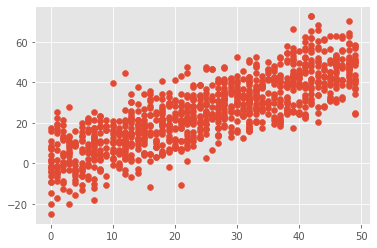

In [45]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()

## Negative correltation

In [46]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

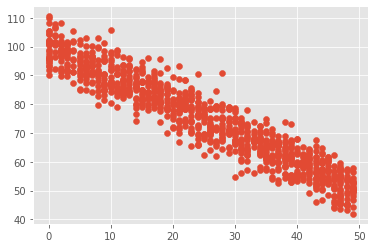

In [47]:
plt.scatter(x, y)
plt.show()

## Weak correlation

In [48]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

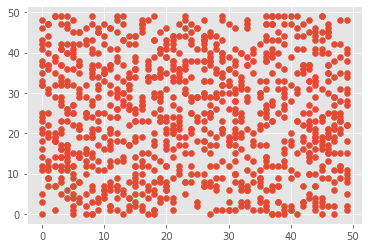

In [49]:
plt.scatter(x, y)
plt.show()

## Correlation Table

In [50]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

df.corr()

,a,b,c,d
a,1.000000,0.825361,-0.948845,0.009802
b,0.825361,1.000000,-0.789391,0.011852
c,-0.948845,-0.789391,1.000000,-0.003228
d,0.009802,0.011852,-0.003228,1.000000


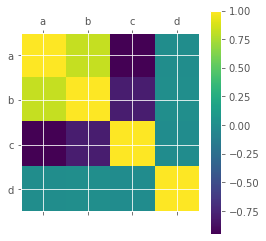

In [53]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Other examples importing database

## Import libraries

In [29]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.datasets import longley
from statsmodels.formula.api import ols
%matplotlib inline


## Import dataset  
https://openei.org/datasets/dataset/consumption-outdoor-air-temperature-11-commercial-buildings

In [30]:
df = pd.read_csv('/home/tamara/Downloads/building1retail.csv', index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


## Plot data

<AxesSubplot:xlabel='Timestamp'>

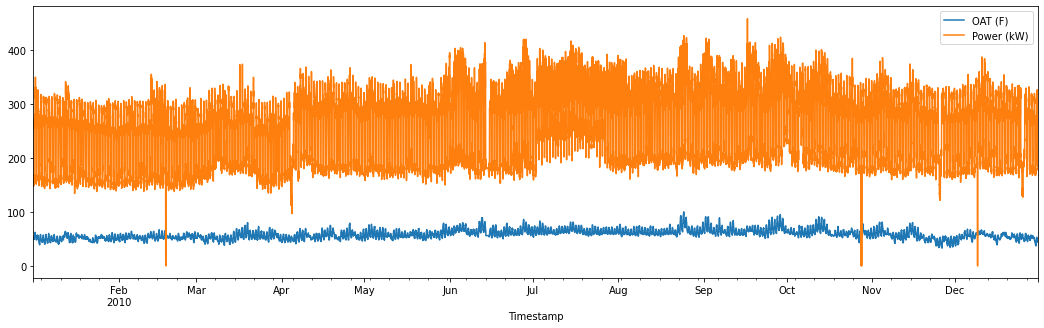

In [31]:
df.plot(figsize=(18,5))

## Plot the distribution

array([[<AxesSubplot:title={'center':'OAT (F)'}>,
        <AxesSubplot:title={'center':'Power (kW)'}>]], dtype=object)

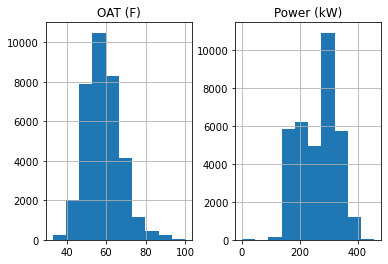

In [32]:
df.hist()

## Remove outliers

In [33]:
std_dev = 3
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

## Plot the clean data

<AxesSubplot:xlabel='Timestamp'>

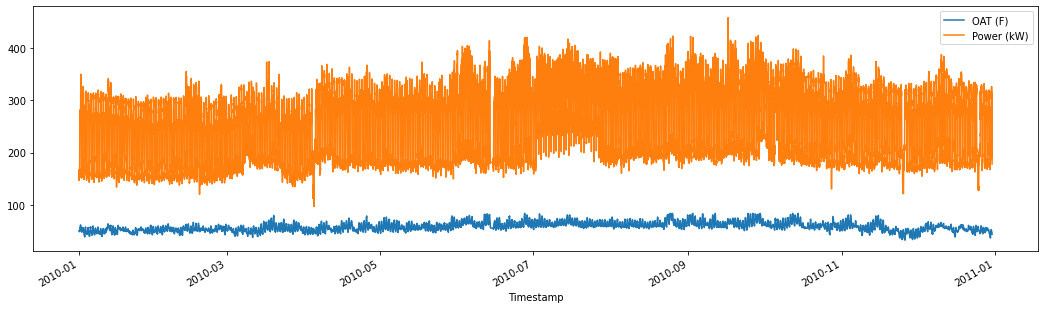

In [34]:
df_new.plot(figsize=(18,5))

## Look for linear relationship

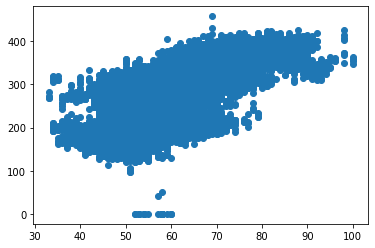

In [35]:
plt.scatter(df['OAT (F)'], df['Power (kW)'])

## Check correlation

In [36]:
corr = df.corr()
print(corr)

             OAT (F)  Power (kW)
OAT (F)     1.000000    0.627155
Power (kW)  0.627155    1.000000


## Make a nice correlation table

In [37]:
corr.style.background_gradient().set_precision(2)

,OAT (F),Power (kW)
OAT (F),1.00,0.63
Power (kW),0.63,1.00


In [43]:
ols_model = statsmodels.regression.linear_model.OLS(df[['OAT (F)']], df[['Power (kW)']])
ols_fit = ols_model.fit()
print(ols_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                OAT (F)   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          9.351e+05
Date:                Thu, 13 Aug 2020   Prob (F-statistic):                        0.00
Time:                        16:58:26   Log-Likelihood:                     -1.3412e+05
No. Observations:               34940   AIC:                                  2.682e+05
Df Residuals:                   34939   BIC:                                  2.682e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Source: 
https://github.com/phgupta/Blog/blob/master/Linear_Regression_Python/Linear_Regression.ipynb